# Project 2 | Recommendation Systems - Amazon

In [47]:
##import the required libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
import warnings; warnings.simplefilter('ignore')
from sklearn.model_selection import GridSearchCV


In [2]:
# Load & read the dataset

amazon = pd.read_csv('ratings_Electronics.csv', header=None)
amazon.head()

,0,1,2,3
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


### 1. Read and explore the dataset. (Rename column, plot histograms, find data characteristics)

In [4]:
amazon.shape

(7824482, 4)

In [5]:
amazon.columns = ['UserId', 'ProductId', 'Ratings', 'Timestamp']

In [7]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
UserId       object
ProductId    object
Ratings      float64
Timestamp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [8]:
#After renaming the columns
amazon.head()

,UserId,ProductId,Ratings,Timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [10]:
#Droping  of Time stamp columns
amazon.drop(amazon[['Timestamp']],axis=1, inplace=True)


In [11]:
amazon.columns

Index(['UserId', 'ProductId', 'Ratings'], dtype='object')

In [13]:
#to find the mean and standard deviation of Ratings
print("Mean value is : {}".format(amazon['Ratings'].mean()))
print("standard deviation value is: {}".format(amazon['Ratings'].std()))

Mean value is : 4.012336791112817
standard deviation value is: 1.3809098185320496


In [15]:
target_var='Ratings'

amazon[target_var].value_counts().to_frame()

,Ratings
5.0,4347541
4.0,1485781
1.0,901765
3.0,633073
2.0,456322


In [16]:
amazon.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
UserId,7824482,4201696,A5JLAU2ARJ0BO,520,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductId,7824482,476002,B0074BW614,18244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ratings,7.82448e+06,NaN,NaN,NaN,4.01234,1.38091,1,3,5,5,5


## from the above table we can observce the below given details  
## Number of Users: 4201696
## Number of Products : 476002
## Number of Ratings  : 7824482

Text(0, 0.5, 'count of reviews')

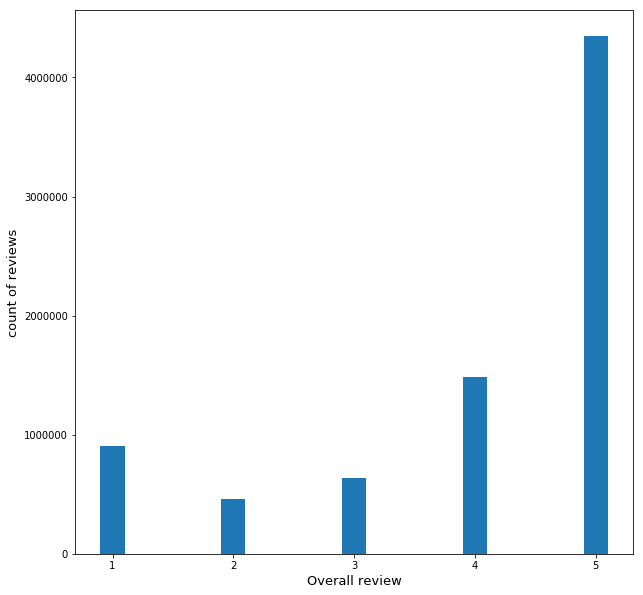

In [17]:

fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(111)
ax.hist(amazon['Ratings'], bins=[0.9, 1.1, 1.9, 2.1, 2.9, 3.1, 3.9, 4.1, 4.9, 5.1])
ax.set_xlabel('Overall review', fontsize=13)
ax.set_ylabel('count of reviews', fontsize=13)


In [20]:
# to check whether any null value exists in the given data set or not 
amazon.isnull().sum()

UserId       0
ProductId    0
Ratings      0
dtype: int64

### . Take subset of dataset to make it less sparse/more dense. (For example, keep the users only who has given 50 or more number of ratings 

In [23]:
amazon['UserId'].value_counts().to_frame()


,UserId
A5JLAU2ARJ0BO,520
ADLVFFE4VBT8,501
A3OXHLG6DIBRW8,498
A6FIAB28IS79,431
A680RUE1FDO8B,406
A1ODOGXEYECQQ8,380
A36K2N527TXXJN,314
A2AY4YUOX2N1BQ,311
AWPODHOB4GFWL,308
ARBKYIVNYWK3C,296


In [24]:
# creating a new data set with the users who has given ratings more than 50 times 
amazon_df = amazon[amazon['UserId'].isin(counts[counts >= 50].index)]

In [25]:
amazon_df.head()

,UserId,ProductId,Ratings
94,A3BY5KCNQZXV5U,0594451647,5.0
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0


In [27]:
amazon_df.shape

(125871, 3)

In [28]:
amazon_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
UserId,125871,1540,A5JLAU2ARJ0BO,520,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductId,125871,48190,B0088CJT4U,206,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ratings,125871,NaN,NaN,NaN,4.26134,1.06214,1,4,5,5,5


## from above table we can find out the below given details 
## Number of users who has rated 50 or more items = 125871
## Number of unique USERS  =  1540
## Number of unique ITEMS  =  48190

In [30]:
product_grouped = amazon_df.groupby(['ProductId']).agg({'Ratings': 'count'}).reset_index()

In [31]:
grouped_sum = product_grouped['Ratings'].sum()

In [32]:
print(grouped_sum)

125871


In [33]:
product_grouped['Percentage'] = product_grouped['Ratings'].div(grouped_sum)*100

In [36]:
## to find out the no of Ratings  given for a Product
##to find out the  Percntage applicable  applicable for product 
product_grouped.sort_values(['Ratings','ProductId'],ascending = [0,1])

,ProductId,Ratings,Percentage
39003,B0088CJT4U,206,0.163660
24827,B003ES5ZUU,184,0.146181
11078,B000N99BBC,167,0.132676
38250,B007WTAJTO,164,0.130292
38615,B00829TIEK,149,0.118375
38611,B00829THK0,137,0.108842
39338,B008DWCRQW,137,0.108842
21982,B002R5AM7C,128,0.101691
28761,B004CLYEDC,118,0.093747
22210,B002SZEOLG,113,0.089774


In [39]:
users = amazon_df['UserId'].unique()

In [40]:
len(users)

1540

In [41]:
 products = amazon_df['ProductId'].unique()

In [42]:
len(products)

48190

### 3. Split the data randomly into train and test dataset. (For example split it in 70/30 ratio)

In [43]:
train_data,test_data = train_test_split(amazon_df,test_size = 0.30,random_state = 0)

In [48]:
print(train_data.shape,test_data.shape)

(88109, 3) (37762, 3)


In [49]:
train_data_grouped = train_data.groupby('ProductId').mean().reset_index()
train_data_sort = train_data_grouped.sort_values(['Ratings', 'ProductId'], ascending = [0,1])

### 4.  Build Popularity Recommender model.
Not able t0 import Recommended system lib so  using the below given menthod

In [50]:
train_data_grouped = train_data.groupby('ProductId').agg({'UserId': 'count'}).reset_index()
train_data_grouped.rename(columns = {'UserId': 'score'},inplace=True)
train_data_grouped.head()

,ProductId,score
0,0594451647,1
1,0594481813,1
2,0970407998,1
3,0972683275,3
4,1400501466,4


In [51]:
#Sort the products on recommendation score 
train_data_sort = train_data_grouped.sort_values(['score', 'ProductId'], ascending = [0,1])

In [52]:
#Generate a recommendation rank based upon score 
train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first') 

In [53]:
#Get the top 5 recommendations 
popularity_recommendations = train_data_sort.head(5) 
popularity_recommendations

,ProductId,score,Rank
30847,B0088CJT4U,133,1.0
30287,B007WTAJTO,124,2.0
19647,B003ES5ZUU,122,3.0
8752,B000N99BBC,114,4.0
30555,B00829THK0,97,5.0


In [54]:
# Using popularity based recommender model to make predictions
def recommend(user_id):     
    user_recommendations = popularity_recommendations 
          
    #Add user_id column for which the recommendation is to be generated 
    user_recommendations['user_id'] = user_id 
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations

In [57]:
find_recom = [10,150,200,300]   # This list is user choic
for i in find_recom:
    print("Please find the below given recommendation for the  respective userId: %d\n" %(i))
    print(recommend(i))    
    print("\n")

Please find the below given recommendation for the  respective userId: 10

       user_id   ProductId  score  Rank
30847       10  B0088CJT4U    133   1.0
30287       10  B007WTAJTO    124   2.0
19647       10  B003ES5ZUU    122   3.0
8752        10  B000N99BBC    114   4.0
30555       10  B00829THK0     97   5.0


Please find the below given recommendation for the  respective userId: 150

       user_id   ProductId  score  Rank
30847      150  B0088CJT4U    133   1.0
30287      150  B007WTAJTO    124   2.0
19647      150  B003ES5ZUU    122   3.0
8752       150  B000N99BBC    114   4.0
30555      150  B00829THK0     97   5.0


Please find the below given recommendation for the  respective userId: 200

       user_id   ProductId  score  Rank
30847      200  B0088CJT4U    133   1.0
30287      200  B007WTAJTO    124   2.0
19647      200  B003ES5ZUU    122   3.0
8752       200  B000N99BBC    114   4.0
30555      200  B00829THK0     97   5.0


Please find the below given recommendation for 

### 5. Build Collaborative Filtering model.

In [58]:
from surprise import Reader, Dataset, SVD, evaluate,accuracy,GridSearch
from surprise.model_selection import GridSearchCV
from surprise.accuracy import rmse
from surprise import dump
from collections import defaultdict
from surprise.model_selection import train_test_split

In [59]:
df_cf = amazon_df
df_cf.head()

,UserId,ProductId,Ratings
94,A3BY5KCNQZXV5U,0594451647,5.0
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0


In [61]:
#User-based Collaborative Filtering
# Matrix with row per 'user' and column per 'item' 
pivot_df = df_cf.pivot(index = 'UserId', columns ='ProductId', values = 'Ratings').fillna(0)
print(pivot_df.shape)
pivot_df.head()

(1540, 48190)


ProductId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
UserId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
pivot_df['user_index'] = np.arange(0, pivot_df.shape[0], 1)
pivot_df.head()

ProductId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8,user_index
UserId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [63]:
pivot_df.set_index(['user_index'], inplace=True)
# Actual ratings given by users
pivot_df.head()

ProductId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### SVD Method

In [64]:
# Singular Value Decomposition
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(pivot_df, k = 50)

# Construct diagonal array in SVD
sigma = np.diag(sigma)

In [65]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 

#to findout the Predicted ratings

preds_df = pd.DataFrame(all_user_predicted_ratings, columns = pivot_df.columns)
preds_df.head()

ProductId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
0,0.005086,0.002178,0.003668,-0.040843,0.009640,0.006808,0.020659,0.000649,0.020331,0.005633,...,0.000238,-0.061477,0.001214,-0.123433,0.028490,0.016109,0.002855,-0.174568,0.011367,-0.012997
1,0.002286,-0.010898,-0.000724,0.130259,0.007506,-0.003350,0.063711,-0.000674,0.016111,-0.002433,...,-0.000038,0.013766,0.001473,0.025588,-0.042103,0.004251,0.002177,-0.024362,-0.014765,0.038570
2,-0.001655,-0.002675,-0.007355,0.007264,0.005152,-0.003986,-0.003480,0.006961,-0.006606,-0.002719,...,-0.001708,-0.051040,0.000325,-0.054867,0.017870,-0.004996,-0.002426,0.083928,-0.112205,0.005964
3,0.001856,0.011019,-0.005910,-0.014134,0.000179,0.001877,-0.005391,-0.001709,0.004968,0.001402,...,0.000582,-0.009326,-0.000465,-0.048315,0.023302,0.006790,0.003380,0.005460,-0.015263,-0.025996
4,0.001115,-0.002670,0.011018,0.014434,0.010319,0.006002,0.017151,0.003726,0.001404,0.005645,...,0.000207,0.023761,0.000747,-0.019347,-0.012749,0.001026,0.001364,-0.020580,0.011828,0.012770


In [66]:
# To Recommend the items with highest predicted ratings

def recommend_items(userID, pivot_df, preds_df, num_recommendations):
      
    user_idx = userID-1 # index starts at 0
    
    # Get and sort the user's ratings
    sorted_user_ratings = pivot_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_ratings
    sorted_user_predictions = preds_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_predictions

    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_ratings', 'user_predictions']
    
    temp = temp.loc[temp.user_ratings == 0]   
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nBelow are the recommended items for user(user_id = {}):\n'.format(userID))
    print(temp.head(num_recommendations))

In [68]:
#Enter 'userID' and 'num_recommendations' for the user #
userID = 100
num_recommendations = 10
recommend_items(userID, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 100):

                   user_ratings  user_predictions
Recommended Items                                
B000QUUFRW                  0.0          0.707524
B002V88HFE                  0.0          0.646016
B007WTAJTO                  0.0          0.580565
B002WE6D44                  0.0          0.487400
B000AZ57M6                  0.0          0.484131
B002NEGTTW                  0.0          0.476034
B0000BZL1P                  0.0          0.462051
B00007E7JU                  0.0          0.434105
B00004ZCJE                  0.0          0.392734
B00017LSPI                  0.0          0.360669


### Evaluate both the models. (Once the model is trained on the training data, it can be used to compute the error (RMSE) on predictions made on the test data.)


In [70]:
final_ratings_matrix = amazon_df.pivot(index = 'UserId', columns ='ProductId', values = 'Ratings').fillna(0)
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

rmse_df = pd.concat([final_ratings_matrix.mean(), preds_df.mean()], axis=1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse_df.shape)
rmse_df['item_index'] = np.arange(0, rmse_df.shape[0], 1)
rmse_df.head()

Shape of final_ratings_matrix:  (1540, 48190)
(48190, 2)


,Avg_actual_ratings,Avg_predicted_ratings,item_index
ProductId,,,
0594451647,0.003247,0.001953,0
0594481813,0.001948,0.002875,1
0970407998,0.003247,0.003355,2
0972683275,0.012338,0.010343,3
1400501466,0.012987,0.004871,4


In [71]:
RMSE = round((((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
print('\nRMSE SVD Model = {} \n'.format(RMSE))


RMSE SVD Model = 0.00275 



### Get top - K (K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits,we will recommend 5 new products.¶

In [79]:
# Enter 'userID' and 'num_recommendations' for the user #
userID = 201
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 201):

                   user_ratings  user_predictions
Recommended Items                                
B000QUUFRW                  0.0          0.690106
B000N99BBC                  0.0          0.680706
B00007E7JU                  0.0          0.665840
B00017LSPI                  0.0          0.629542
B00004ZCJE                  0.0          0.602450


## 8. Summarise your insights.


1)Popularity based  recommended system  is highly non based personalized ,so by default this system recommends  the product viewed /purchased  by most people
2)So the Pblm with recommmendation system is  that Personalization is  not available within this method

Through Collabrative can identify the users  who have similar taste/purchase of same products ,so similraity is based up on their purchasing behaviour,so it is highly personalized  
Disadvantage with collabarative is at the initial days suffcient data is not available which is called as cold start